# Coursework Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Your notebook should:
- run without errors
- complete execution in no more than 1 minute
- be well-organised with import statements, functions and executable code clearly separated
- not include any redundant code
- include sufficient text and/or comments such that a reader could easily understand the flow of your program

## Organisation

> A maximum of **5 marks** will be awarded to submissions that meet these requirements.

|Criterion|Mark|
|---|---|
|Notebook too disorganised to assess|0|
|Solution presented but some execution errors or does not complete in a timely fashion |1-2|
|Solution presented with sufficient commentary. May include some redundant code or ineffiencies |3-4|
|Solution presented including markdown commentary and efficient coding practice|5|

## Part 1

For each step, example solutions are shown but any method which produces the correct output is OK. Deduct 1 mark if the simulation fails in a small number of edge cases (unless the edge cases are impossible or irrelevant in the context of the problem). Do not award marks for the test case if it only works in a trivial way (eg hardcoded values).

Partial marks awarded where solutions which do not work but where the correct algorithm is attempted.

### Step 1

**4 marks** will be awarded for a function which correctly returns an array as described and **1 mark** for including the test case.

No need to check for impossible parameter values (eg `n` too large).

In [2]:

def initialise_grid(N, n):
    x = np.zeros((N, N))
    k = 0
    while k < n:
        i = np.random.randint(N)
        j = np.random.randint(N)
        if x[i,j] == 0:
            k += 1
            x[i,j] = 1
    k = 0
    while k < n:
        i = np.random.randint(N)
        j = np.random.randint(N)
        if x[i,j] == 0:
            k += 1
            x[i,j] = 2
    
    return x


grid = initialise_grid(4, 5)

# A 4 by 4 array with exactly 5 `1`s and 5 `2`s
print(grid)

[[2. 0. 0. 0.]
 [1. 2. 0. 2.]
 [0. 0. 1. 1.]
 [1. 2. 1. 2.]]


### Step 2

**4 marks** for a function which returns the correct value for all possible arguments `x`, `i` and `j`, and **1 mark** for including the test cases.

In [3]:
def neighbours_same(x, i, j):
    N = len(x)
    count = 0
    for a in range(max((i-1), 0), min(i+2, N)):
        for b in range(max((j-1), 0), min(j+2, N)):
            if x[a, b] == x[i,j]:
                count = count + 1
    count = count - 1
    return count
    
x_test = np.array([[2, 2, 1, 2, 1],
                   [0, 1, 1, 1, 1],
                   [2, 2, 0, 0, 0],
                   [2, 1, 2, 2, 2],
                   [2, 1, 1, 0, 1]])

print(neighbours_same(x_test, 0, 0))
print(neighbours_same(x_test, 0, 1))
print(neighbours_same(x_test, 1, 0))
print(neighbours_same(x_test, 1, 1))

1
1
0
2


### Step 3

**2 marks** for a function which returns the correct value for all possible arguments `x`, `i` and `j`, and **1 mark** for including the test cases.

In [4]:

def neighbours_total(x, i, j):
    N = len(x)
    count = 0
    for a in range(max((i-1), 0), min(i+2, N)):
        for b in range(max((j-1), 0), min(j+2, N)):
            if x[a, b] != 0:
                count = count + 1
    if x[i, j] != 0:
        count = count - 1
    return count
    
print(neighbours_total(x_test, 0, 0))
print(neighbours_total(x_test, 0, 1))
print(neighbours_total(x_test, 1, 0))
print(neighbours_total(x_test, 1, 1))

2
4
5
6


### Step 4

**4 marks** for a function which executes correctly for all possible arguments `x` and `f`, and **1 mark** for including the test case.


In [6]:
def get_dissatisfied_cells(x, f):
    N = len(x)
    dis = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            same = neighbours_same(x, i, j)
            total = neighbours_total(x, i, j)
            if x[i,j] != 0 and total != 0 and same/total < f:
                dis[i,j] = 1
    return dis
f = 0.4

print(get_dissatisfied_cells(x_test, f))

[[0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1.]]


### Step 5

**6 marks** for a function which works as described for all possible imputs of `x` and `f`, **1 mark** for including the test case.

In [7]:
def advance(x, f):
    N = len(x)
    dis = get_dissatisfied_cells(x, f)
    result = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if dis[i, j] == 0:
                result[i, j] = x[i, j]
                
    for i in range(N):
        for j in range(N):
            if dis[i, j] == 1:
                i_new = np.random.randint(N)
                j_new = np.random.randint(N)
                while result[i_new, j_new] != 0:
                    i_new = np.random.randint(N)
                    j_new = np.random.randint(N)
                result[i_new, j_new] = x[i, j]
    return result
    
f = 0.3

x2 = advance(x_test, f)
print(x2)

[[2. 0. 1. 0. 1.]
 [2. 1. 1. 1. 1.]
 [2. 2. 1. 0. 2.]
 [2. 0. 2. 2. 2.]
 [2. 1. 1. 1. 0.]]


### Step 6

**2 marks** for correctly initialising the grid, **3 marks** for executing the simulation and displaying the results.


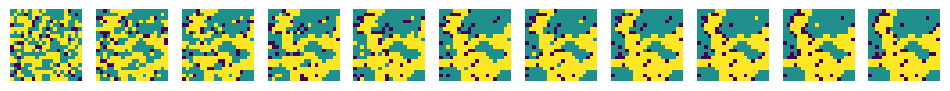

In [8]:
N = 20
n = int(N**2 * .45)
f = 0.5
num = 10

grid = initialise_grid(N, n)

fig, axes = plt.subplots(1, num+1, figsize=(12,2))

axes[0].imshow(grid)
axes[0].axis("off")

for i in range(num):
    
    grid = advance(grid, f)

    axes[i+1].imshow(grid)
    axes[i+1].axis("off")

## Part 2

|Category|Mark|Description|
|---|---|---|
|Analysis/Results|7|The simulation executed for a variety of values of $f$ and the results presented and described. At least one different starting condition or grid size demonstrated. Maximum of 3 marks if a determination of the values of $f$ resulting in equilibrium only determined 'by eye'.|
|Conclusions|3|The simulation reaches equilibrium for small values of $f$ but not large. A threshold value of $f$ determined. A valid statement as to whether starting condition or grid size affects this value.|
|Evaluation|2|Comments of the strengths/limitations of the conclusions (eg stochastcity of the simulation, slow run time), possible mitigations (eg averaging), or improvements that could be made (eg. changes to make it run faster, test more parameter values)|
|Communication|3|Full marks for clearly presented results described with full sentences. Figures annotated with parameter values.|

The following is a sketch of a possible solution to this question.

Varying $f$ but fixing the other parameters as in step 6 we can see that time simulation heads towards a stable equilbrium for small values of $f$, but not for large values. 

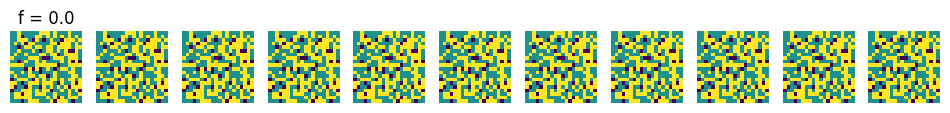

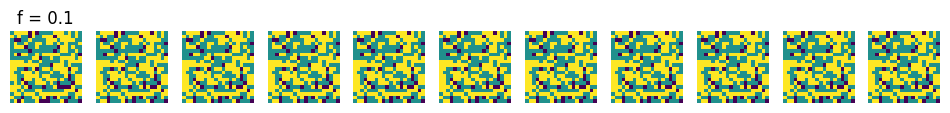

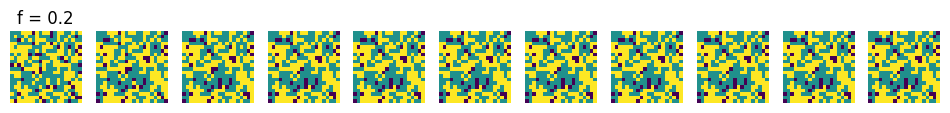

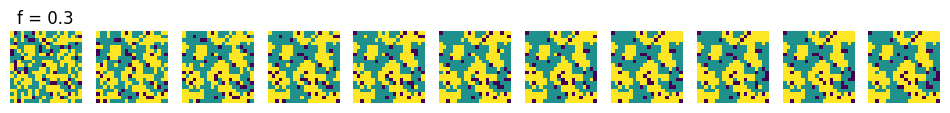

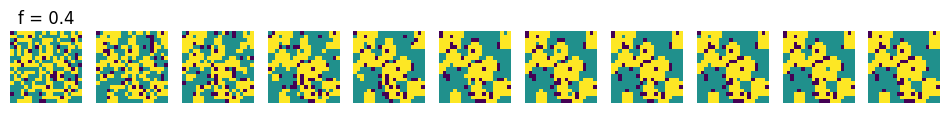

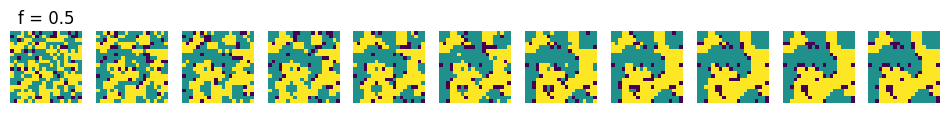

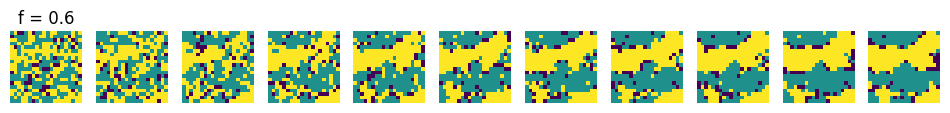

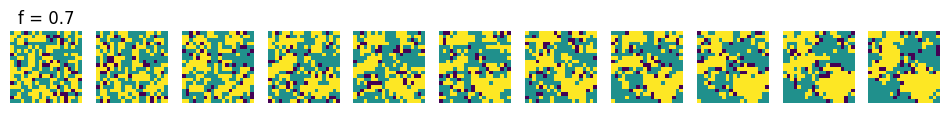

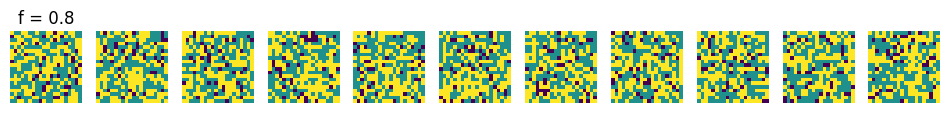

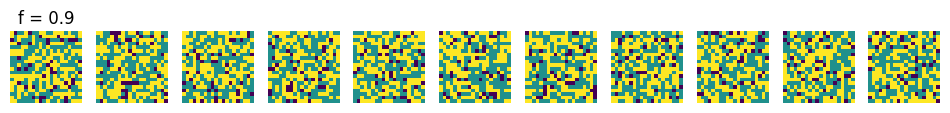

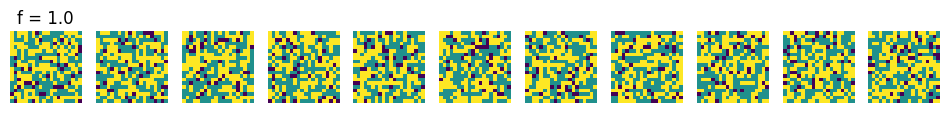

In [9]:
f_array = np.linspace(0, 1, 11)
for f in f_array:

    N = 20
    n = int(N**2 * .45)

    num = 10

    grid = initialise_grid(N, n)

    fig, axes = plt.subplots(1, num+1, figsize=(12,2))
    axes[0].set_title("f = %.1f" % f)

    axes[0].imshow(grid)
    axes[0].axis("off")

    for i in range(num):
        
        grid = advance(grid, f)

        axes[i+1].imshow(grid)
        axes[i+1].axis("off")

Determining whether equilibrium is reached by eye is unreliable, so it is better to find a computational method. To determine the whether a particular simulation has reached equilbrium, we can test if consecutive arrays are equal. Use `np.all(grid == grid2)` (where `grid2` is the current array and `grid` is the previous one) to test if the array has changed between steps.

The code below defines a function `equilibrium_reached` which returns an array of `1`s and `0`s corresponding to whether consecutive arrays are equal at each timestep.

In [10]:
# For the given parameters N, f, p and num,
# Returns an array whose values are 1 if consecutive arrays
# Are equal and 0 if they are different
def equilibrium_reached(N, f, p, num):
    n = int(N**2 * p)

    grid = initialise_grid(N, n)

    equilibrium = np.zeros(num)
    for i in range(num):
        
        grid2 = advance(grid, f)

        if np.all(grid == grid2):
            equilibrium[i] = 1

        grid = grid2

    return equilibrium

We run the simulation for values of `f` bewteen 0 and 1. For simulations which reach equilibrium, the last element in each array is `1`. We can see that equilibrium is reached somewhere between `0.5` and `0.6`.

In [11]:
n = 11
f_array = np.linspace(0, 1, n)
for i in range(n):
    print(f_array[i], equilibrium_reached(20, f_array[i], .45, 30))

0.0 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.1 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.2 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.30000000000000004 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1.]
0.5 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.6000000000000001 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.7000000000000001 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.8 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [12]:
n = 11
f_array = np.linspace(0.4, 0.6, n)
for i in range(n):
    print(f_array[i], equilibrium_reached(20, f_array[i], .45, 30))

0.4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.42000000000000004 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.44 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.46 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.48 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.5 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.52 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.54 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1.]
0.56 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.58 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.6 [0.

Finding an exact value of $f$ which results in equilibrium is not possible due to the stochastic (random) nature of the simulation, although one way to mitigate against this would be to execute the simulation many times for each value of $f$. Furthermore, it is not possible to determine if a simulation 'eventually' reaches equilibrium without running it forever, so a maximum number of iterations must be fixed in advance (in this case `20`).